In [75]:
import matplotlib
import numpy as np
import math
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [403]:
#Here I define the function by which infection spreads through the population. 
#I consider, that only these agents who was ill in the beginning of the day can transmit disease. Thus I need inf here.

def infection(Lattice, infected, beta):
    inf = []
    for j in range(len(infected)):
        
        #Below I go through all 4 neighbors of every infected agent.
        for k in range(4):
            x = infected[j][0]+k%2*(-1)**(k//2)
            y = infected[j][1]+(k+1)%2*(-1)**(k//2+1)
            prob = np.random.rand()
            
            #if agent is susceptible and the probability is suitable -- infect
            if Lattice[x][y] == 1 and prob<beta: 
                Lattice[x][y] = 2
                inf.append([x,y])
    
    #concatenate "old" infected and "young" ones
    if inf!=[]: infected = np.concatenate((inf,infected), axis = 0)
    return Lattice, infected

In [404]:
#Here I define the function by which infected agens get recovered.

def recover(Lattice, inf, gamma):
    j=0
    while j<len(inf):
        x = inf[j][0]
        y = inf[j][1]
        prob = np.random.rand()
        
        #if agent is infected and the probability is suitable -- get recover
        if Lattice[x][y] == 2 and prob<gamma: 
            Lattice[x][y] = 3
            inf = np.delete(inf, (j), axis=0) #and delete an infected person from the list
        else: j=j+1
    return Lattice, inf

In [439]:
#Here I define the function by which all agens perform a step.
#I went further and made a confinement for agents to be in the same cell. Thus I need Latt here.

def step(Lattice):
    Latt = np.zeros([a+2,a+2])
    for j in range(1,a+1):
        for k in range(1,a+1):
            if Lattice[j][k] !=0:
                c=[[j,k]]
                for q in range(4):
                    x = j+q%2*(-1)**(q//2)
                    y = k+(q+1)%2*(-1)**(q//2+1)
                    if Lattice[x][y] == 0 and x!=0 and x!=a+1 and y!=0 and y!=a+1 and Latt[x][y]==0:
                        c.append([x,y])
                        
                if len(c)>1 and np.random.rand()<st:
                    var = np.random.randint(1,len(c))
                else:
                    var = 0
                Latt[c[var][0]][c[var][1]] = Lattice[j][k]
    
    #update the list of infected individuals
    infected = []
    for j in range(1,a+1):
        for k in range(1,a+1):
            if Lattice[j][k] == 2: infected.append([j, k])
    return Latt, infected

In [451]:
#Here I define the function by which random agents die and born in random cells of the lattice

def birth_death(Lattice, infected, mu):
    n=0
    if 0 in Lattice: n=n+1
    
    c=0
    while c < mu:
        j = np.random.randint(1,a+1)
        k = np.random.randint(1,a+1)
        
        f=True
        qq = 0
        while f==True and qq<len(infected):
            if infected[qq][0] == j and infected[qq][1] == k:
                infected = np.delete(infected, (qq), axis=0)
                f = False
            qq = qq+1
            
        if Lattice[j][k] !=0:                
            Lattice[j][k] =0
            c=c+1
    c=0
    while c < mu:
        j = np.random.randint(1,a+1)
        k = np.random.randint(1,a+1)
        if Lattice[j][k] ==0: 
            Lattice[j][k] = 1
            c=c+1
            
    return Lattice, infected

R= 3.846153846153846


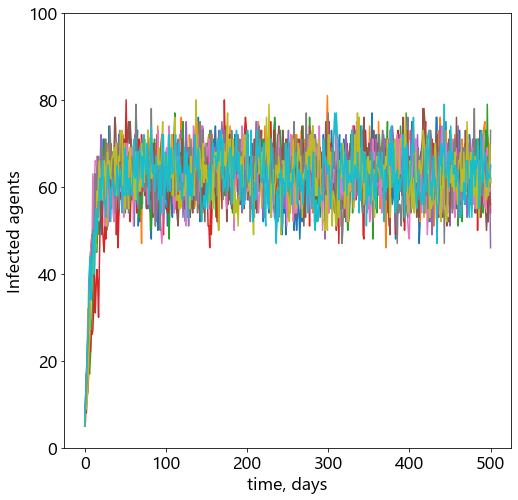

In [479]:
a = 15 #size of the lattice
n = 100 #size of population
beta = 0.5 #probability of getting ill after an interaction
st = 0.01 #probability to make a step (if possible)
gamma = 0.01 #probability of getting recovered
mu = 1 #birth/death rate
R = beta/(gamma+mu/n)
print('R=', R)

days = 500
plt.figure (figsize=(8,8))

for rep in tqdm( range(10) ):
    Lattice = np.zeros([a+2,a+2]) #creates an empty lattice with borders
    s = 95
    j=0
    while j<s:
        coord = np.random.randint(1,a+1,2)
        if Lattice[coord[0]][coord[1]] == 0:
            Lattice[coord[0]][coord[1]] = 1
            j=j+1

    #infected individuals
    i = 5
    infected = []
    j = 0
    while j<i:
        coord = np.random.randint(1,a+1,2)
        if Lattice[coord[0]][coord[1]] == 0:
            Lattice[coord[0]][coord[1]] = 2
            j=j+1
            infected.append([coord[0], coord[1]])
    iii = [len(infected)]
    
    for qq in range(days):
        Lattice,infected = infection(Lattice, infected, beta)
        Lattice, infected = step(Lattice)
        Lattice, infected = birth_death(Lattice, infected, mu)
    #     Lattice = birth(Lattice, mu)
    #     print('\n')
        Lattice, infected = recover(Lattice, infected, gamma)
        iii.append(len(infected))
        
    plt.plot(range(days+1), iii, '-')
plt.xlabel('time, days') 
plt.ylabel('Infected agents')
plt.ylim(0,n)
plt.show()